# Group Work Submission 1

Select a gold Exchange Traded Fund: GLD SPDR Gold Shares [NYSE] ,  
Select an equity ETF from outside the US: EXS1 Shares Core DAX UCITS ETF (DE)

In [1]:
import quandl
import pandas as pd
import pandas_datareader.data as reader
import datetime as dt
import statsmodels.api as sm
import yfinance as yf
from pandas_datareader import data as pdr
import numpy as np
from numpy import mean
from numpy import cov
import statistics
import matplotlib as plt
import matplotlib.pyplot as plt
import mplfinance as mpf
from matplotlib import rcParams
import statsmodels
from scipy import stats
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
from arch import arch_model
from nelson_siegel_svensson import NelsonSiegelCurve, NelsonSiegelSvenssonCurve
from nelson_siegel_svensson.calibrate import calibrate_ns_ols, calibrate_nss_ols
import statsmodels.tsa.stattools as sts
import warnings
warnings.filterwarnings('ignore')

Import closing daily interest rates of the 6 active benchmarks of US Treasury yields, 
For the months of October 2019 and November 2019. Imported 3-Month, 1-year, 2-year, 5-year, 10-year, and 30-year maturitie.
# Import data from Quandl

In [2]:
Importrates = quandl.get("USTREASURY/YIELD", start_date="2019-10-01", end_date="2019-11-30")

Removing unnecessary yields

In [3]:
Tyields = Importrates.drop(['1 MO', '2 MO', '6 MO', '3 YR', '7 YR', '20 YR'], axis=1)
#Saved the data in csv
#Tyields.to_csv("Tyields.csv")

Import your gold ETF prices for the months of October 2019 and November 2019

In [4]:
GoldETF = pdr.get_data_yahoo("GLD", start="2019-10-01", end="2019-11-30")
#Saved the data in csv
#GoldETF.to_csv("GLD.csv")

Import your equity ETF price for the months of October 2019 and November 2019

In [5]:
StockETF = pdr.get_data_yahoo("EXS1.DE", start="2019-10-01", end="2019-11-30")
#Saved the data in csv
#StockETF.to_csv("StockETF.csv")

# Data Processing
Compute the daily returns of your Gold ETF and your Equity ETF. Also performed for Oct & Nov.

In [6]:
GoldETFreturn = np.log(GoldETF['Adj Close']) - np.log(GoldETF['Adj Close'].shift(1))
StockETFreturn = np.log(StockETF['Adj Close']) - np.log(StockETF['Adj Close'].shift(1))
OCTGoldETFreturn = GoldETFreturn.iloc[1: 23]
NOVGoldETFreturn = GoldETFreturn.iloc[23: 43]
OCTStockETFreturn = StockETFreturn.iloc[1: 22]
NOVStockETFreturn = StockETFreturn.iloc[22: 43]

In [7]:
OCTGoldETFreturn #OCT Gold returns

Date
2019-10-02    0.011606
2019-10-03    0.004520
2019-10-04    0.000000
2019-10-07   -0.008564
2019-10-08    0.008705
2019-10-09    0.000916
2019-10-10   -0.008768
2019-10-11   -0.005555
2019-10-14    0.003991
2019-10-15   -0.006995
2019-10-16    0.005714
2019-10-17    0.001423
2019-10-18   -0.001067
2019-10-21   -0.004782
2019-10-22    0.002929
2019-10-23    0.002351
2019-10-24    0.007091
2019-10-25    0.002329
2019-10-28   -0.008637
2019-10-29   -0.002777
2019-10-30    0.005475
2019-10-31    0.009949
Name: Adj Close, dtype: float64

In [8]:
NOVGoldETFreturn #Nov Gold returns

Date
2019-11-01    0.000912
2019-11-04   -0.002880
2019-11-05   -0.016312
2019-11-06    0.004281
2019-11-07   -0.015643
2019-11-08   -0.006385
2019-11-11   -0.002405
2019-11-12    0.002696
2019-11-13    0.003994
2019-11-14    0.004195
2019-11-15   -0.002529
2019-11-18    0.002962
2019-11-19    0.000505
2019-11-20    0.000505
2019-11-21   -0.005492
2019-11-22   -0.001886
2019-11-25   -0.004803
2019-11-26    0.004803
2019-11-27   -0.005314
2019-11-29    0.006185
Name: Adj Close, dtype: float64

In [9]:
OCTStockETFreturn #Oct ESX1 returns

Date
2019-10-02   -0.028378
2019-10-04    0.007608
2019-10-07    0.007164
2019-10-08   -0.010863
2019-10-09    0.010863
2019-10-10    0.006347
2019-10-11    0.027047
2019-10-14   -0.001681
2019-10-15    0.010598
2019-10-16    0.004245
2019-10-17   -0.001106
2019-10-18   -0.002030
2019-10-21    0.008462
2019-10-22    0.001464
2019-10-23    0.003105
2019-10-24    0.005818
2019-10-25    0.001087
2019-10-28    0.004517
2019-10-29   -0.000541
2019-10-30   -0.002348
2019-10-31   -0.003260
Name: Adj Close, dtype: float64

In [10]:
NOVStockETFreturn #Nov ESX1 returns

Date
2019-11-01    0.007049
2019-11-04    0.013418
2019-11-05    0.001421
2019-11-06    0.002127
2019-11-07    0.008113
2019-11-08   -0.004225
2019-11-11   -0.002473
2019-11-12    0.006170
2019-11-13   -0.003874
2019-11-14   -0.003889
2019-11-15    0.004418
2019-11-18   -0.002649
2019-11-19    0.001060
2019-11-20   -0.004070
2019-11-21   -0.001597
2019-11-22    0.001952
2019-11-25    0.005833
2019-11-26   -0.000353
2019-11-27    0.003344
2019-11-28   -0.002639
2019-11-29   -0.001234
Name: Adj Close, dtype: float64

# Data Summaries
For the month of October, compute the average yield for each benchmark security. & Calculation for November.

In [11]:
OCTTyields = Tyields.iloc[0: 22]
OCTTyieldsavg = mean(OCTTyields)
NOVTyields = Tyields.iloc[22: 45]
NOVTyieldsavg = mean(NOVTyields)

In [12]:
OCTTyieldsavg #Oct average yield

3 MO     1.678636
1 YR     1.608182
2 YR     1.551364
5 YR     1.525000
10 YR    1.706818
30 YR    2.190455
dtype: float64

In [13]:
NOVTyieldsavg #Nov average yield

3 MO     1.572105
1 YR     1.567895
2 YR     1.612632
5 YR     1.639474
10 YR    1.812105
30 YR    2.280526
dtype: float64

For the month of October, compute the average price the Gold ETF.

In [14]:
OCTGold = GoldETF.iloc[0: 23]
OCTGoldavg = mean(OCTGold['Adj Close'])
OCTGoldavg

140.87478173297384

Average calculation for November:

In [15]:
NOVGold = GoldETF.iloc[23: 43]
NOVGoldavg = mean(NOVGold['Adj Close'])
NOVGoldavg

138.57049942016602

For the month of October, compute the average price the Equity ETF.

In [16]:
OCTStock = StockETF.iloc[0: 22]
OCTStockavg = mean(OCTStock['Adj Close'])
OCTStockavg

107.43818248401989

Average calculation for November:

In [17]:
NOVStock = StockETF.iloc[22: 43]
NOVStockavg = mean(NOVStock['Adj Close'])
NOVStockavg

113.10761878603981

For the month of October, compute the standard deviation for each benchmark security. Calculation for November.

In [18]:
StdevOCTTyields = OCTTyields.std()
StdevNOVTyields = NOVTyields.std()

In [19]:
StdevOCTTyields #Oct standard deviation yield

3 MO     0.057677
1 YR     0.042498
2 YR     0.080315
5 YR     0.104460
10 YR    0.104808
30 YR    0.101300
dtype: float64

In [20]:
StdevNOVTyields #Nov standard deviation yield

3 MO     0.024399
1 YR     0.025073
2 YR     0.033804
5 YR     0.052755
10 YR    0.065028
30 YR    0.076918
dtype: float64

For the month of October, compute the standard deviation of the Gold ETF. Calculation for November.

In [21]:
StdevOCTGold = statistics.stdev(OCTGold['Adj Close'])
StdevNOVGold = statistics.stdev(NOVGold['Adj Close'])

In [22]:
StdevOCTGold #Oct Gold standard deviation

0.8312292769142049

In [23]:
StdevNOVGold #Nov Gold standard deviation 

1.5620945751529574

For the month of October, compute the standard deviation of the Equity ETF. Calculation for November.

In [24]:
StdevOCTStock = statistics.stdev(OCTStock['Adj Close'])
StdevNOVStock = statistics.stdev(NOVStock['Adj Close'])

In [25]:
StdevOCTStock #Oct ESX1 standard deviation

3.0186713753017393

In [26]:
StdevNOVStock #Nov ESX1 standard deviation 

0.6153853577060089

# Graphing
Graph the 6 benchmark securities for the 2 months on 1 plot & Add a legend.

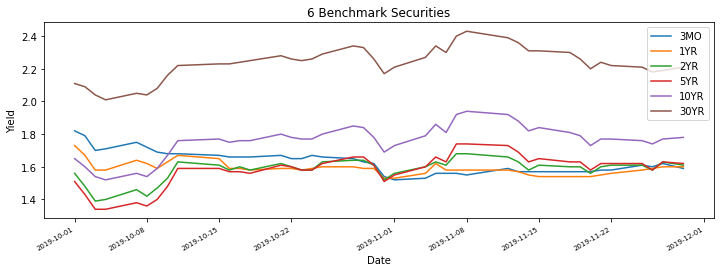

In [27]:
Tyields.plot(figsize=(12,4))
plt.gca().legend(('3MO','1YR','2YR','5YR','10YR','30YR'))
plt.title('6 Benchmark Securities')
plt.xlabel('Date')
plt.ylabel('Yield')
plt.tick_params(axis='x', labelsize=7)

Plot the gold ETF prices for the 2 months. Use the left-side axis for the price.

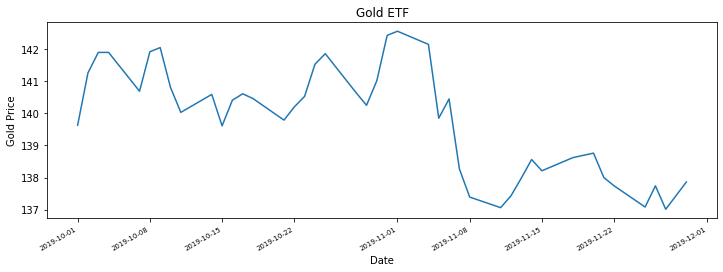

In [28]:
GoldETF['Adj Close'].plot(figsize=(12,4))
plt.title('Gold ETF')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.tick_params(axis='x', labelsize=7)

On the same graph, plot the equity ETF prices for the 2 months.Be sure to use a separate scale,  and the right-side axis for the price label

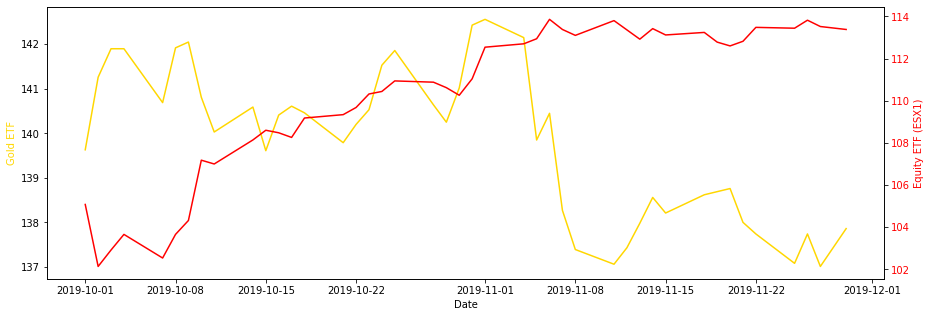

In [29]:
fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(111)
ax1.plot(GoldETF.index, GoldETF['Adj Close'], 'gold')
ax1.set_ylabel('Gold ETF', color='gold')
ax1.set_xlabel('Date')

ax2 = ax1.twinx()
ax2.plot(GoldETF.index, StockETF['Adj Close'], 'r-')
ax2.set_ylabel('Equity ETF (ESX1)', color='r')
ax2.set_xlabel('Date')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

# Fitting the Yield Curve

Use either Nelson-Siegel, or Nelson-Siegel-Svensson to fit the Yield Curve. Write out the equation. 

We choose the Nelson-Siegel, as after running both models we realized that the parameters of Nelson-Siegel were more stable.

* The Nelson-Siegel forward rate function is defined as:

    𝑦(𝑚) = 𝛽𝑜 + 𝛽1 ∙ (1 − 𝑒^−𝑚/𝜏/𝑚/𝜏) + 𝛽2 ∙ (1 − 𝑒^−𝑚/𝜏/𝑚/𝜏− 𝑒^−𝑚/𝜏)


Fit the yield curve each day using the 6 benchmark yields for the October data

In [30]:
t = np.array([2, 3, 5, 7, 10, 30])
yOCT29 = Tyields.iloc[19].values

curve, status_1 = calibrate_ns_ols(t, yOCT29)
assert status_1.success
print(curve)

NelsonSiegelCurve(beta0=2.6695884390679807, beta1=-0.8153910869696579, beta2=-2.1224844067492405, tau=3.4627867984366)


In [31]:
y29 = NelsonSiegelCurve(curve.beta0, curve.beta1, curve.beta2, curve.tau)

In [32]:
yNOV1 = Tyields.iloc[0].values  

curve1, status1 = calibrate_ns_ols(t, yNOV1)
assert status1.success
print(curve1)

NelsonSiegelCurve(beta0=2.4863641095450952, beta1=-0.08049079264902881, beta2=-3.0298074312425745, tau=3.613890204289824)


In [33]:
y01 = NelsonSiegelCurve(curve1.beta0, curve1.beta1, curve1.beta2, curve1.tau)

In [34]:
extrap_time = np.linspace(0, 50, 300)

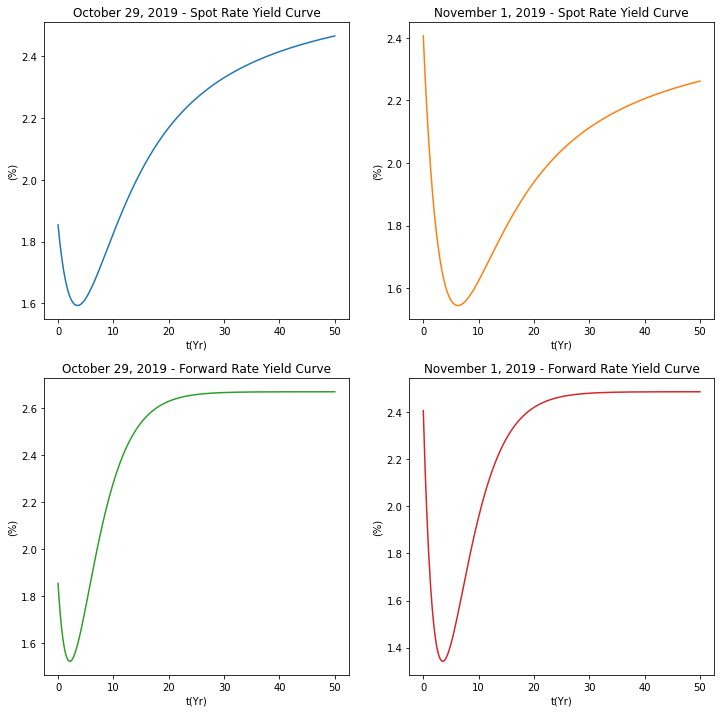

In [35]:
fig, axs = plt.subplots(2, 2, figsize=(12,12))
axs[0, 0].plot(extrap_time, y29.zero(extrap_time))
axs[0, 0].set_title('October 29, 2019 - Spot Rate Yield Curve')

axs[0, 1].plot(extrap_time, y01.zero(extrap_time), 'tab:orange')
axs[0, 1].set_title('November 1, 2019 - Spot Rate Yield Curve')
axs[1, 0].plot(extrap_time, y29.forward(extrap_time), 'tab:green')
axs[1, 0].set_title('October 29, 2019 - Forward Rate Yield Curve')

axs[1, 1].plot(extrap_time, y01.forward(extrap_time), 'tab:red')
axs[1, 1].set_title('November 1, 2019 - Forward Rate Yield Curve')

for ax in axs.flat:
    ax.set(xlabel='t(Yr)', ylabel='(%)')

Fit the yield curve each day using the 6 benchmark yields for the October data.

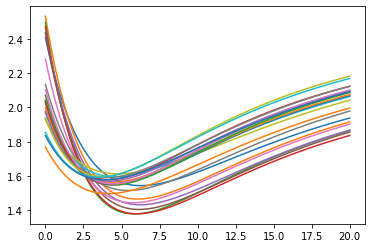

In [36]:
parameters = {'beta0':[], 'beta1':[], 'beta2':[], 'tau':[]}


for i in range(len(OCTTyields)):
    curve, status = calibrate_ns_ols(t, OCTTyields.iloc[i].values)
    if status.success:
        x = np.linspace(0, 20, 100)
        plt.plot(x, curve(x))
        for attr, value in curve.__dict__.items():
            parameters[attr].append(value)
        
    else:
        print('No fit')
        for attr, value in curve.__dict__.items():
            parameters[attr].append(None)

In [37]:
OctNS = OCTTyields.copy()

for key, value in parameters.items():
   OctNS[key] = value

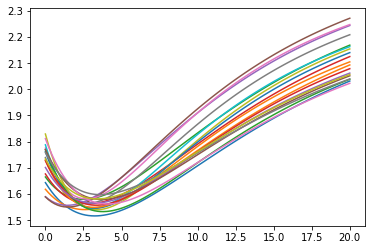

In [38]:
NOVparameters = {'beta0':[], 'beta1':[], 'beta2':[], 'tau':[]}


for i in range(len(NOVTyields)):
    curve, status = calibrate_ns_ols(t, NOVTyields.iloc[i].values)
    if status.success:
        x = np.linspace(0, 20, 100)
        plt.plot(x, curve(x))
        for attr, value in curve.__dict__.items():
            NOVparameters[attr].append(value)
    else:
        print('No fit')
        for attr, value in curve.__dict__.items():
            NOVparameters[attr].append(None)

In [39]:
NovNS = NOVTyields.copy()

for key, value in NOVparameters.items():
    NovNS[key] = value

 What are the significant changes, if any? Be specific with regards to the values of the parameters!

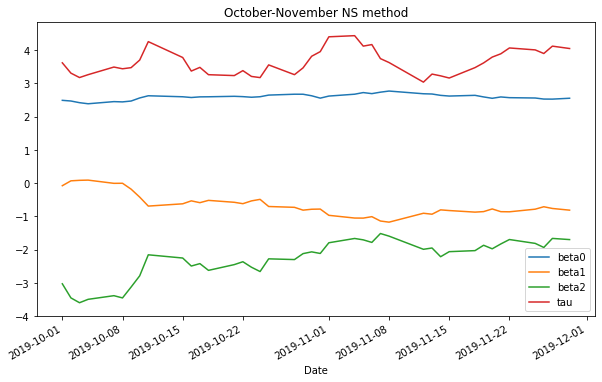

In [40]:
NSparameter = ['beta0', 'beta1', 'beta2', 'tau']
data = OctNS[NSparameter].append(NovNS[NSparameter])
data.plot(figsize=(10,6), title='October-November NS method');

In [41]:
OctNS.tail()

,3 MO,1 YR,2 YR,5 YR,10 YR,30 YR,beta0,beta1,beta2,tau
Date,,,,,,,,,,
2019-10-25,1.66,1.60,1.63,1.62,1.80,2.29,2.643999,-0.705849,-2.279490,3.551708
2019-10-28,1.65,1.60,1.64,1.66,1.85,2.34,2.670167,-0.730587,-2.301184,3.257934
2019-10-29,1.63,1.59,1.64,1.66,1.84,2.33,2.669588,-0.815391,-2.122484,3.462787
2019-10-30,1.62,1.59,1.61,1.61,1.78,2.26,2.623359,-0.788243,-2.069516,3.811769
2019-10-31,1.54,1.53,1.52,1.51,1.69,2.17,2.552574,-0.783134,-2.117781,3.950810


In [42]:
NovNS.head()

,3 MO,1 YR,2 YR,5 YR,10 YR,30 YR,beta0,beta1,beta2,tau
Date,,,,,,,,,,
2019-11-01,1.52,1.53,1.56,1.55,1.73,2.21,2.614511,-0.971093,-1.795985,4.396682
2019-11-04,1.53,1.56,1.60,1.60,1.79,2.27,2.670795,-1.052848,-1.667020,4.430630
2019-11-05,1.56,1.62,1.63,1.66,1.86,2.34,2.719771,-1.054803,-1.708287,4.116145
2019-11-06,1.56,1.58,1.61,1.63,1.81,2.30,2.687826,-1.011389,-1.785279,4.162911
2019-11-07,1.56,1.58,1.68,1.74,1.92,2.40,2.731761,-1.142229,-1.518164,3.740522


* Actually, We ran both models Nelson-Siegel & Nelson-Siegel-Svensson. Based on our result we decided to use Nelson-Siegel, as this has more stability in the parameters however after inspection of the parameter plot there was still some minor variability in November.

* The following parameters beta1, beta2 and tau had significant changes in November compared to October. beta1 derceased, while ceta2 and tau increased in November.
* Beta0 has not changed as much compared to the other parameters.

# Modeling Prices
Using the October gold ETF prices, run an ARMA model with your choice of parameters.

* After checking the ADF test, it was concluded the GLD ETF prices are non-stationary.

* Both in October & November, the ACF and PACF decay exponentially. 
* Ran models: ARIMA(1,1,1),(1,2,1),(1,1,2),(2,1,2), Based on that ARIMA(1,1,1) is the best-fit model becuase the AIC (60.33) and BIC(64.70) are the smallest for ARIMA(1,1,1), and P-values are below 0.05. Also Log Likelihood -26.168 is the highest.

In [43]:
sts.adfuller(OCTGold['Adj Close']) #checking for stationary

(-1.9943952807325052,
 0.2890359675950407,
 7,
 15,
 {'1%': -3.9644434814814815,
  '5%': -3.0849081481481484,
  '10%': -2.6818144444444445},
 24.74797243569019)

In [44]:
OCTGOLDARMA = ARIMA(OCTGold['Adj Close'], order = [1,1,1])
OCTGOLDARMAresult = OCTGOLDARMA.fit()
OCTGOLDARMAresult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.Adj Close   No. Observations:                   22
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -26.168
Method:                       css-mle   S.D. of innovations              0.760
Date:                Mon, 29 Mar 2021   AIC                             60.337
Time:                        12:23:03   BIC                             64.701
Sample:                    10-02-2019   HQIC                            61.365
                         - 10-31-2019                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0341      0.054      0.630      0.529      -0.072       0.140
ar.L1.D.Adj Close     0.5633      0.242      2.333      0.020       0.090       1.037
ma.L1.D.Adj Close    -0.9999      0.135     -7.425      0.000      -1.264      -0.736
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.7751           +0.0000j            1.7751            0.0000
MA.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

Using the November gold ETF prices, run an ARMA model with your choice of parameters

* Ran models: ARIMA(1,1,1),(1,2,1),(1,1,2),(2,1,2), based on that ARIMA(1,1,2) is best-fit as the AIC(53.05) and BIC(57.77) are the smallest.
* Log Likelihood is -21.52 higher for ARIMA(1,1,2) compared to ARIMA(1,1,1).

* For November the Standard error is much higher 0.266 compared to October 0.054. 
* The Z-score is 0.63 in October much lower compared to November -1.29.

In [45]:
sts.adfuller(NOVGold['Adj Close']) #checking for stationary

(-2.950173808366197,
 0.039816860137433005,
 8,
 11,
 {'1%': -4.223238279489106,
  '5%': -3.189368925619835,
  '10%': -2.729839421487603},
 -36.278737396765706)

In [46]:
NOVGOLDARMA = ARIMA(NOVGold['Adj Close'], order = [1,1,2])
NOVGOLDARMAresult = NOVGOLDARMA.fit()
NOVGOLDARMAresult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.Adj Close   No. Observations:                   19
Model:                 ARIMA(1, 1, 2)   Log Likelihood                 -21.526
Method:                       css-mle   S.D. of innovations              0.662
Date:                Mon, 29 Mar 2021   AIC                             53.052
Time:                        12:23:09   BIC                             57.774
Sample:                             1   HQIC                            53.851
                                                                              
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.3434      0.266     -1.290      0.197      -0.865       0.178
ar.L1.D.Adj Close    -0.2980      0.249     -1.195      0.232      -0.787       0.191
ma.L1.D.Adj Close     0.3582      0.153      2.336      0.019       0.058       0.659
ma.L2.D.Adj Close     1.0000      0.384      2.602      0.009       0.247       1.753
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.3559           +0.0000j            3.3559            0.5000
MA.1           -0.1791           -0.9839j            1.0000           -0.2787
MA.2           -0.1791           +0.9839j            1.0000            0.2787
-----------------------------------------------------------------------------
"""

After checking the ADF test, it was concluded the ESX1 ETF prices are non-stationary for October, also on the chart the trend upward.

Using the October equity ETF prices, run an ARMA model with your choice of parameters

 * Ran models: ARIMA(1,1,1),(1,2,1),(2,2,2),(2,1,2), For Oct, ARIMA(2,1,2) is better-fit compared to ARIMA(1,1,1),(1,2,1)) as AIC(69.48) is the smallest, although BIC (75.75) isn`t,
* Also  Log Likelihood is the highesr for ARIMA(2,1,2).

In [47]:
sts.adfuller(OCTStock['Adj Close']) #checking for stationary

(-2.9622884464019226,
 0.038569438064897016,
 5,
 16,
 {'1%': -3.9240193847656246, '5%': -3.0684982031250003, '10%': -2.67389265625},
 10.537713746971367)

In [48]:
OCTStockARMA = ARIMA(OCTStock['Adj Close'], order = [2,1,2])
OCTStockARMAresult = OCTStockARMA.fit()
OCTStockARMAresult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.Adj Close   No. Observations:                   21
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 -28.742
Method:                       css-mle   S.D. of innovations              0.871
Date:                Mon, 29 Mar 2021   AIC                             69.484
Time:                        12:23:14   BIC                             75.751
Sample:                             1   HQIC                            70.844
                                                                              
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2888      0.184      1.567      0.117      -0.072       0.650
ar.L1.D.Adj Close    -0.1972      0.320     -0.615      0.538      -0.825       0.431
ar.L2.D.Adj Close    -0.5979      0.341     -1.754      0.079      -1.266       0.070
ma.L1.D.Adj Close    -0.2601      0.245     -1.063      0.288      -0.740       0.219
ma.L2.D.Adj Close     1.0000      0.252      3.962      0.000       0.505       1.495
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.1649           -1.2827j            1.2932           -0.2703
AR.2           -0.1649           +1.2827j            1.2932            0.2703
MA.1            0.1301           -0.9915j            1.0000           -0.2292
MA.2            0.1301           +0.9915j            1.0000            0.2292
-----------------------------------------------------------------------------
"""

After checking the ADF test, it was concluded the ESX1 ETF prices are stationary for November.

Using the November equity ETF prices, run an ARMA model with your choice of parameters

* ARMA(1,1) is best-fit as the as the AIC(40.23) and BIC(44.41) are smallest for this model compared to ARMA(1,2),(2,2).
* For November the AIC 40.23 & BIC 44.41 are significanly lower compared to October AIC 73.85 & BIC 80.39.
* For November the Standard error is much lower 0.376 compared to October 1.348. However the Z-score in October is much lower at 79.87, in November it`s 300.61.

In [49]:
sts.adfuller(NOVStock['Adj Close']) #checking for stationary

(-5.140322874821844,
 1.1624738370362362e-05,
 0,
 20,
 {'1%': -3.8092091249999998, '5%': -3.0216450000000004, '10%': -2.6507125},
 9.744688974641782)

In [50]:
NOVStockARMA = ARMA(NOVStock['Adj Close'], order = [1,1])
NOVStockARMAresult = NOVStockARMA.fit()
NOVStockARMAresult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                   21
Model:                     ARMA(1, 1)   Log Likelihood                 -16.116
Method:                       css-mle   S.D. of innovations              0.513
Date:                Mon, 29 Mar 2021   AIC                             40.232
Time:                        12:23:19   BIC                             44.410
Sample:                    11-01-2019   HQIC                            41.139
                         - 11-29-2019                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             112.9441      0.376    300.614      0.000     112.208     113.681
ar.L1.Adj Close     0.7034      0.335      2.097      0.036       0.046       1.361
ma.L1.Adj Close    -0.0092      0.413     -0.022      0.982      -0.818       0.800
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4216           +0.0000j            1.4216            0.0000
MA.1          108.7153           +0.0000j          108.7153            0.0000
-----------------------------------------------------------------------------
"""

# Modelling Volatility

Using gold ETF prices, find the daily high minus low for each month.

In [51]:
OCTGoldDayRange = OCTGold['High'] - OCTGold['Low']
NOVGoldDayRange = NOVGold['High'] - NOVGold['Low']

In [52]:
OCTGoldDayRange #Oct daily high minus low 

Date
2019-10-01    2.389999
2019-10-02    1.419998
2019-10-03    1.960007
2019-10-04    1.169998
2019-10-07    1.529999
2019-10-08    1.119995
2019-10-09    0.960007
2019-10-10    1.080002
2019-10-11    1.279999
2019-10-14    0.480011
2019-10-15    1.089996
2019-10-16    0.830002
2019-10-17    0.699997
2019-10-18    0.389999
2019-10-21    1.159988
2019-10-22    0.580002
2019-10-23    0.500000
2019-10-24    0.810013
2019-10-25    1.430008
2019-10-28    0.850006
2019-10-29    0.850006
2019-10-30    1.489990
2019-10-31    0.800003
dtype: float64

In [53]:
NOVGoldDayRange #Nov daily high minus low 

Date
2019-11-01    0.889999
2019-11-04    0.709991
2019-11-05    1.509995
2019-11-06    0.789993
2019-11-07    2.599991
2019-11-08    0.940002
2019-11-11    1.349991
2019-11-12    1.399994
2019-11-13    0.580002
2019-11-14    1.070007
2019-11-15    0.449997
2019-11-18    0.550003
2019-11-19    0.839996
2019-11-20    0.899994
2019-11-21    0.789993
2019-11-22    0.800003
2019-11-25    0.629990
2019-11-26    1.220001
2019-11-27    0.380005
2019-11-29    1.050003
dtype: float64

Compute the average for October. & Compute the average for November

In [54]:
OCTGoldavgRange = mean(OCTGoldDayRange)
NOVGoldavgRange = mean(NOVGoldDayRange)

In [55]:
OCTGoldavgRange #Oct mean

1.081305462381114

In [56]:
NOVGoldavgRange #Nov mean

0.97249755859375

Using the gold ETF returns, find the standard deviation for October. Repeat for November

In [57]:
StdevOCTGoldETFreturn = OCTGoldETFreturn.std()
StdevNOVGoldETFreturn = NOVGoldETFreturn.std()

In [58]:
StdevOCTGoldETFreturn #Oct standard deviation

0.006170210650602775

In [59]:
StdevNOVGoldETFreturn #Nov standard deviation

0.00621744081203111

Using the October gold ETF returns, find a GARCH(1,1) model.  

In [60]:
OCTGOLDGARCH = arch_model(OCTGoldETFreturn, mean="Constant", vol="GARCH", p=1, q = 1)
OCTGOLDGARCHresult = OCTGOLDGARCH.fit()
OCTGOLDGARCHresult.summary

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3443189.574750718
Iteration:      2,   Func. Count:     16,   Neg. LLF: -81.26790639650277
Optimization terminated successfully    (Exit mode 0)
            Current function value: -81.26790642844298
            Iterations: 6
            Function evaluations: 16
            Gradient evaluations: 2


<bound method ARCHModelResult.summary of                      Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                81.2679
Distribution:                  Normal   AIC:                          -154.536
Method:            Maximum Likelihood   BIC:                          -150.172
                                        No. Observations:                   22
Date:                Mon, Mar 29 2021   Df Residuals:                       21
Time:                        12:23:49   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         8.6

Repeat for November

In [61]:
NOVGOLDGARCH = arch_model(NOVGoldETFreturn, mean="Constant", vol="GARCH", p=1, q = 1)
NOVGOLDGARCHresult = NOVGOLDGARCH.fit()
NOVGOLDGARCHresult.summary

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1197994263722790.2
Iteration:      2,   Func. Count:     16,   Neg. LLF: -73.88584268282811
Optimization terminated successfully    (Exit mode 0)
            Current function value: -73.88584271058463
            Iterations: 6
            Function evaluations: 16
            Gradient evaluations: 2


<bound method ARCHModelResult.summary of                      Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                73.8858
Distribution:                  Normal   AIC:                          -139.772
Method:            Maximum Likelihood   BIC:                          -135.789
                                        No. Observations:                   20
Date:                Mon, Mar 29 2021   Df Residuals:                       19
Time:                        12:23:52   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         

What are the significant changes, if any?  Be specific with regards to the values of the parameters!

* From October to November, the Alpha increased from 0.01 to 0.05, it`s a significant increase. This is due to the shock of the reduced benchmark interest rate.
* Beta decreased from 0.69 to 0.65. Seems the high volatility period did not persist. Omega decreased slightly from 0.000010914 to 0.000010913.

Using equity ETF prices, find the daily high minus low for each month.

In [62]:
OCTStockDayRange = OCTStock['High'] - OCTStock['Low']
NOVStockDayRange = NOVStock['High'] - NOVStock['Low']

In [63]:
OCTStockDayRange #Oct daily high minus low 

Date
2019-10-01    1.959999
2019-10-02    2.599998
2019-10-04    1.139999
2019-10-07    1.099998
2019-10-08    1.479996
2019-10-09    2.059998
2019-10-10    1.439995
2019-10-11    2.180000
2019-10-14    0.900002
2019-10-15    1.459999
2019-10-16    0.820000
2019-10-17    1.799995
2019-10-18    0.839996
2019-10-21    1.040001
2019-10-22    0.459999
2019-10-23    0.979996
2019-10-24    0.800003
2019-10-25    0.559998
2019-10-28    0.760002
2019-10-29    0.400002
2019-10-30    0.959999
2019-10-31    1.379997
dtype: float64

In [64]:
NOVStockDayRange #Nov daily high minus low 

Date
2019-11-01    0.760002
2019-11-04    1.320000
2019-11-05    0.459999
2019-11-06    0.639999
2019-11-07    0.580002
2019-11-08    0.639999
2019-11-11    0.659996
2019-11-12    0.800003
2019-11-13    1.059998
2019-11-14    0.500000
2019-11-15    0.599998
2019-11-18    1.260002
2019-11-19    1.599998
2019-11-20    0.919998
2019-11-21    1.059998
2019-11-22    1.040001
2019-11-25    0.459999
2019-11-26    0.500000
2019-11-27    0.799995
2019-11-28    0.400002
2019-11-29    1.120003
dtype: float64

Compute the average for October. & Compute the average for November.

In [75]:
OCTStockavgRange = mean(OCTStockDayRange)
NOVStockavgRange = mean(NOVStockDayRange)

In [66]:
OCTStockavgRange #Oct mean

1.2327260104092685

In [67]:
NOVStockavgRange #Nov mean

0.8180948893229166

Using equity ETF returns, find the standard deviation for October. Repeat for November.

In [74]:
StdevOCTStockETFreturn = OCTStockETFreturn.std()
StdevNOVStockETFreturn = NOVStockETFreturn.std()

In [69]:
StdevOCTStockETFreturn #Oct standard deviation

0.010261123206057264

In [70]:
StdevNOVStockETFreturn #Nov standard deviation

0.0048041637131694724

Using October equity ETF returns, find a GARCH(1,1) model.

In [77]:
OCTStockGARCH = arch_model(OCTStockETFreturn, mean="Constant", vol="GARCH", p=1, q = 1)
OCTStockGARCHresult = OCTStockGARCH.fit()
OCTStockGARCHresult.summary

Iteration:      1,   Func. Count:      6,   Neg. LLF: 4197743.868176087
Iteration:      2,   Func. Count:     17,   Neg. LLF: 4.829517324336456e+16
Iteration:      3,   Func. Count:     29,   Neg. LLF: -69.41792205887626
Optimization terminated successfully    (Exit mode 0)
            Current function value: -69.41792252778242
            Iterations: 7
            Function evaluations: 29
            Gradient evaluations: 3


<bound method ARCHModelResult.summary of                      Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                69.4179
Distribution:                  Normal   AIC:                          -130.836
Method:            Maximum Likelihood   BIC:                          -126.658
                                        No. Observations:                   21
Date:                Mon, Mar 29 2021   Df Residuals:                       20
Time:                        12:25:35   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         2.0698

Repeat for November

In [73]:
NOVStockGARCH = arch_model(NOVStockETFreturn, mean="Constant", vol="GARCH", p=1, q = 1)
NOVStockGARCHresult = NOVStockGARCH.fit()
NOVStockGARCHresult.summary

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1.1388426438755635e+17
Iteration:      2,   Func. Count:     17,   Neg. LLF: 868014660.9821305
Iteration:      3,   Func. Count:     29,   Neg. LLF: 1.0356320800344224e+16
Iteration:      4,   Func. Count:     41,   Neg. LLF: -83.41140555843154
Optimization terminated successfully    (Exit mode 0)
            Current function value: -83.41140565803397
            Iterations: 8
            Function evaluations: 41
            Gradient evaluations: 4


<bound method ARCHModelResult.summary of                      Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                83.4114
Distribution:                  Normal   AIC:                          -158.823
Method:            Maximum Likelihood   BIC:                          -154.645
                                        No. Observations:                   21
Date:                Mon, Mar 29 2021   Df Residuals:                       20
Time:                        12:24:26   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         8.6852

What are the significant changes, if any?  Be specific with regards to the values of the parameters!

* From October to November, the Alpha did not change at all, stayed at 0.2. Seems the reduced benchmark interest rate, had no effect on this Equity ETF.
* Beta decreased from 0.78 to 0.70. Also Seems the high volatility period did not persist. Omega increased from 0.0000020039 to 0.0000022124.

# Correlation

Data slice due to holiday on 2019-10-03 in Germany & data slice due to Thanksgiving on 2019-11-28 in USA.

In [78]:
PearsonOCTGoldETFreturn = OCTGoldETFreturn.drop(OCTGoldETFreturn.index[[1,1]])
PearsonNOVStockETFreturn = NOVStockETFreturn.drop(NOVStockETFreturn.index[[19,19]])

Compute the Pearson correlation between the gold and equity returns in October. Repeat for November.

In [79]:
stats.pearsonr(PearsonOCTGoldETFreturn, OCTStockETFreturn) #Oct Pearson correlation 

(-0.6531725311306777, 0.0013253678132820414)

In [80]:
stats.pearsonr(NOVGoldETFreturn, PearsonNOVStockETFreturn) #Nov Pearson correlation 

(-0.3081497007130647, 0.1862373048245023)

10-day rolling correlations are also computed for the entire period.

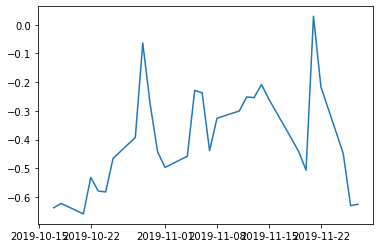

In [81]:
corr = GoldETFreturn.rolling(10).corr(StockETFreturn)
plt.plot(corr)